Does the link lead to an HTML page describing the exploratory analysis of the training data set?

Has the data scientist done basic summaries of the three files? Word counts, line counts and basic data tables?

Has the data scientist made basic plots, such as histograms to illustrate features of the data?

Was the report written in a brief, concise style, in a way that a non-data scientist manager could appreciate?

In [1]:
library(tidytext)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
#basic summaries of the three files? Word counts, line counts and basic data tables?

loadFile <- function(filepath) {
    con = file(filepath, "r")
    lines <- readLines(con)
    close(con)
    
    lines
}

In [23]:
summarise <- function(filepath){
    lines <- loadFile(filepath)
    linesDf <- tibble(line = 1:length(lines), text = lines)
    wordsDf <- linesDf %>%
      unnest_tokens(word, text)
    
    wordCounts <- wordsDf %>%
      anti_join(stop_words) %>%
      count(word, sort = TRUE)
    
    results <- list(
        lines = linesDf,
        nLines = nrow(linesDf),
        words = wordsDf,
        nWords = nrow(wordsDf),
        wordCounts = wordCounts,
        mostCommonWords = head(wordCounts, n=20)
    )
    results
}

In [24]:
tweets <- summarise('../data/final/en_US/en_US.twitter.txt')
news <- summarise('../data/final/en_US/en_US.news.txt')
blogs <- summarise('../data/final/en_US/en_US.blogs.txt')

Warning message in readLines(con):
“line 167155 appears to contain an embedded nul”Warning message in readLines(con):
“line 268547 appears to contain an embedded nul”Warning message in readLines(con):
“line 1274086 appears to contain an embedded nul”Warning message in readLines(con):
“line 1759032 appears to contain an embedded nul”Joining, by = "word"
Joining, by = "word"
Joining, by = "word"


In [32]:
tibble(
    dataset = c('tweets','blogs', 'news'),
    lineCount = c(tweets$nLines, blogs$nLines, news$nLines),
    wordCount = c(tweets$nWords, blogs$nWords, news$nWords),
    mostCommonWord = c(tweets$mostCommonWords$word[1], blogs$mostCommonWords$word[1], news$mostCommonWords$word[1]),
)

dataset,lineCount,wordCount,mostCommonWord
tweets,2360148,30093369,love
blogs,899288,37546246,time
news,1010242,34762395,time


In [28]:
tweets$mostCommonWords$word[1]

[1] "love"

In [14]:
blogs$mostCommonWords

word,n
the,1860156
and,1094401
to,1069440
a,900362
of,876799
i,775032
in,598532
that,460782
is,432712
it,403902


In [15]:
news$mostCommonWords

word,n
the,1974366
to,906145
and,889511
a,878035
of,774502
in,679065
for,353901
that,347079
is,284240
on,269881


In [17]:
plotCommonWords <- function(words) {
    words %>%
    anti_join(stop_words) %>%
    count(word, sort = TRUE) %>%
    head(n = 20) %>%
    mutate(word = reorder(word, n)) %>%
    ggplot(aes(word, n)) +
    geom_col() +
    xlab(NULL) +
    coord_flip()    
}

Joining, by = "word"


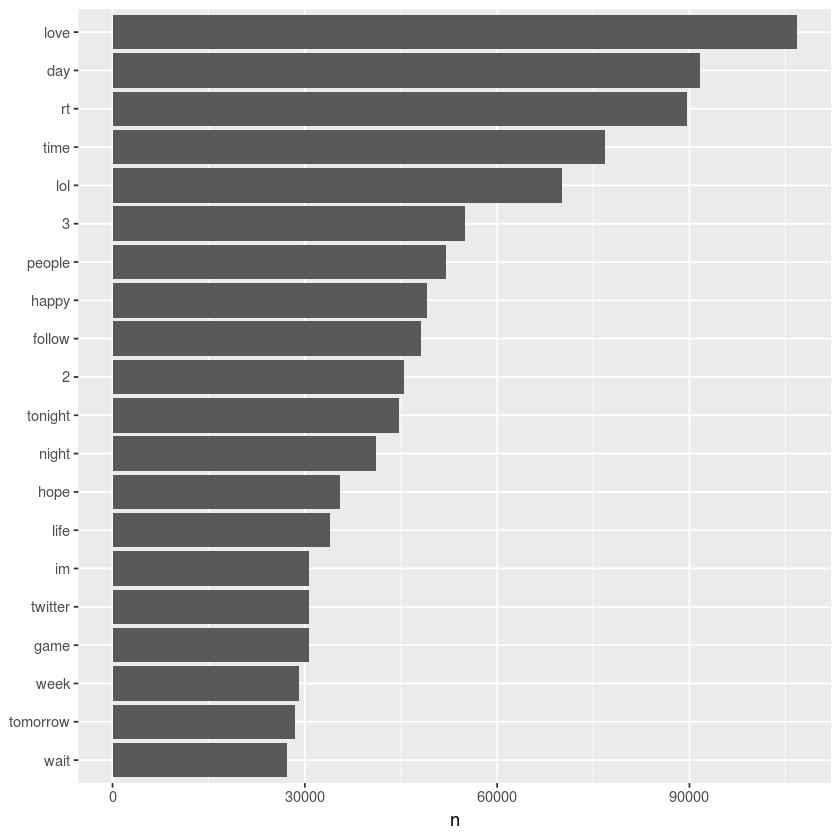

In [18]:
plotCommonWords(tweets$words)

Joining, by = "word"


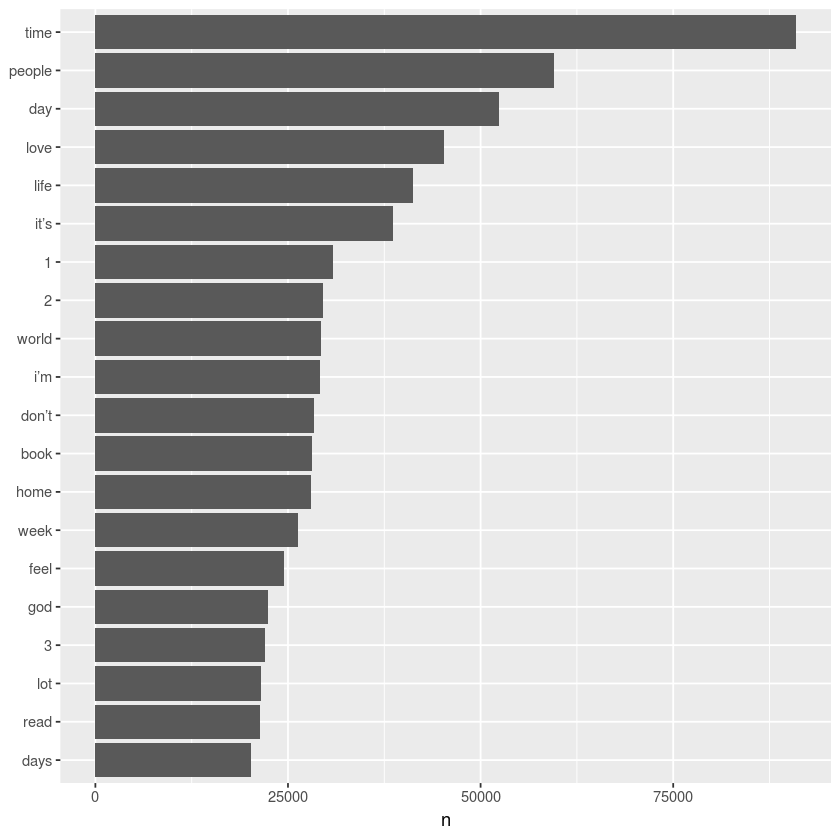

In [19]:
plotCommonWords(blogs$words)

Joining, by = "word"


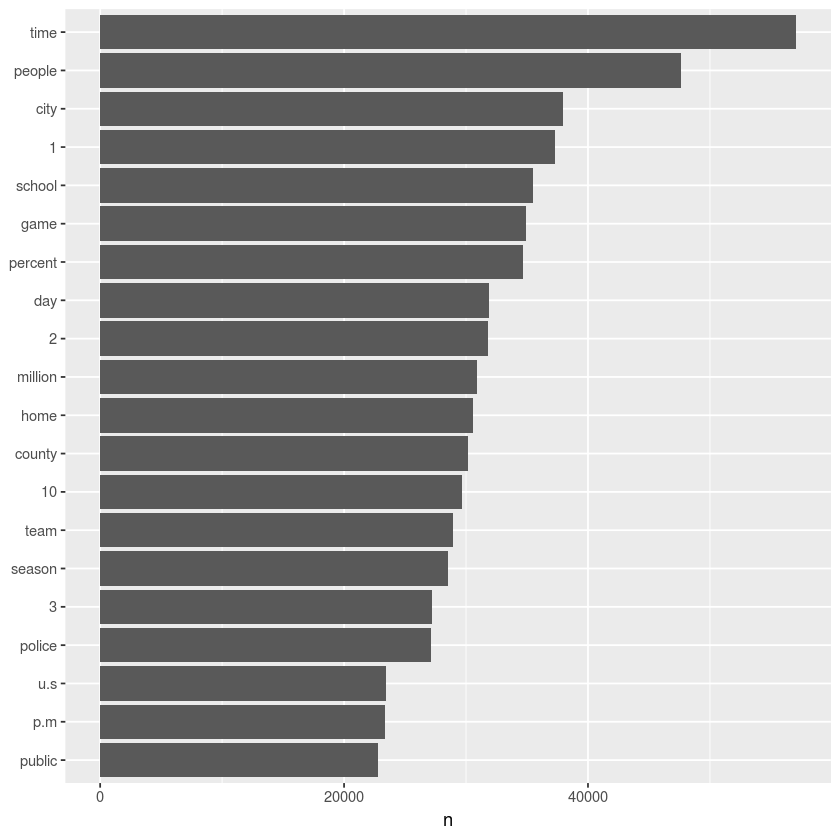

In [20]:
plotCommonWords(news$words)